In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/train.csv')
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
data = np.array(data)
m, n = data.shape # m = 42000, n = 785
np.random.shuffle(data)
# print(data) # converts to numpy array

In [3]:
# * Development data
data_dev = data[0:1000].T
Y_dev = data_dev[0] # predicted values of development data
X_dev = data_dev[1:n] 
X_dev = X_dev / 255. # contains the pixel values ,  normalizing the data


# * Training data
data_train = data[1000:m].T
Y_train = data_train[0] # predicted values of training data
X_train = data_train[1:n]
X_train = X_train / 255.
ignore, m_train = X_train.shape


In [4]:
def init_params():
    w1 = np.random.rand(10, 784) - 0.5 # 10 neurons, 784 weights each
    b1 = np.random.rand(10, 1) - 0.5 # 10 neurons, 1 bias each
    w2 = np.random.rand(10, 10) - 0.5 # 10 neurons, 10 weights each . why? -> because 10 outputs from previous layer
    b2 = np.random.rand(10, 1) - 0.5 # 10 neurons, 1 bias each

    return w1, b1, w2, b2

In [5]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [6]:
def forward_prop(w1, b1, w2, b2 ,x):
    z1 = np.dot(w1, x) + b1
    a1 = ReLU(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)

    return z1, a1, z2, a2
    

In [7]:
def backward_prop(z1,a1, z2, a2, w2, y, x):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T

    dz2 = a2 - one_hot_y # calulcates true - predicted
    dw2 = 1/m * np.dot(dz2, a1.T) 
    db2 = 1/m * np.sum(dz2)

    dz1 = w2.T.dot(dz2) * (z1 > 0) # derivative of ReLU : (z1 > 0)
    dw1 = 1/m * np.dot(dz1, x.T) 
    db1 = 1/m * np.sum(dz1)

    return dw1, db1, dw2, db2


In [8]:
def gradient_descent(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    return W1, b1, W2, b2

In [9]:

def get_predictions(a2):
    return np.argmax(a2,0)

In [10]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y)/Y.size

In [11]:
def neural_net(X, Y, iterations, learning_rate):
    w1, b1, w2, b2 = init_params()
    for i in range(iterations):
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, X)

        dW1, db1, dW2, db2 = backward_prop(z1, a1, z2, a2, w2, Y, X)

        w1, b1, w2, b2 = gradient_descent(w1, b1, w2, b2, dW1, db1, dW2, db2, learning_rate)

        if i % 100 == 0:
            print("Iteration: ", i)
            print("Accuracy: ",get_accuracy(get_predictions(a2), Y))

    return w1, b1, w2, b2    
        

In [12]:

w1, b1, w2, b2 = neural_net(X_train, Y_train, 500, 0.1)

Iteration:  0
[0 0 7 ... 7 7 7] [6 1 4 ... 2 2 0]
Accuracy:  0.05041463414634147
Iteration:  100
[6 1 4 ... 2 8 2] [6 1 4 ... 2 2 0]
Accuracy:  0.647609756097561
Iteration:  200
[6 1 4 ... 2 8 0] [6 1 4 ... 2 2 0]
Accuracy:  0.7737073170731708
Iteration:  300
[6 1 9 ... 3 8 0] [6 1 4 ... 2 2 0]
Accuracy:  0.8165365853658536
Iteration:  400
[6 1 9 ... 3 8 0] [6 1 4 ... 2 2 0]
Accuracy:  0.8389268292682927


In [13]:
def make_predictions(X, W1, b1, W2, b2):
    ignore1, ignore2, ignore3, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2) 
    return predictions

In [14]:

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


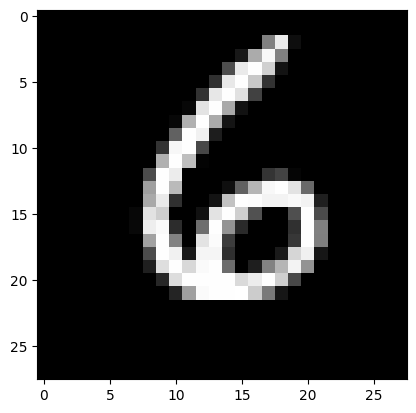

Prediction:  [1]
Label:  1


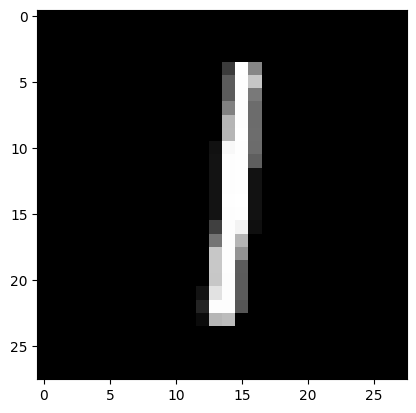

Prediction:  [9]
Label:  4


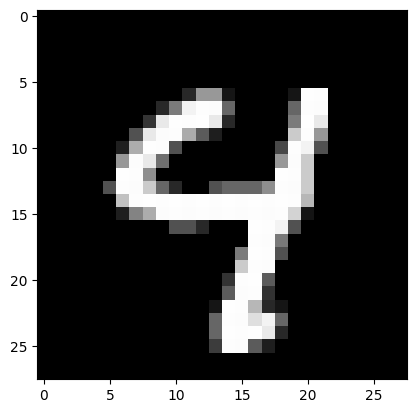

Prediction:  [4]
Label:  9


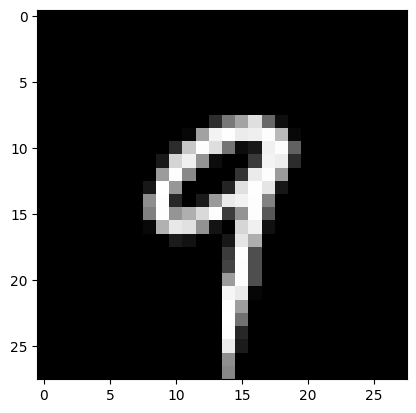

In [15]:

test_prediction(0, w1, b1, w2, b2)
test_prediction(1, w1, b1, w2, b2)
test_prediction(2, w1, b1, w2, b2)
test_prediction(3, w1, b1, w2, b2)